##### Лаб 4
##### Варіант 6:

$$
\left\{
    \begin{array}\\
        -10.3 x_1 + 10.2 x_2 = 70 \\
        4.7 x_1 + 12.3 x_2 = 173 \\
        13.2 x_1 + 8.8 x_2 = 282
    \end{array}
\right.
$$

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.colors as mcolors

plt.style.use('bmh')

In [2]:
A = [
    [-10.3, 10.2],
    [4.7, 12.3],
    [13.2, 8.8],
]

B = [70, 173, 282]

A = np.array(A)
B = np.array(B)

In [3]:
intersections = np.array([np.linalg.solve(A[list(i)], B[list(i)]) for i in combinations(range(len(B)), 2)])
# for i in combinations(range(len(B)), 2):
#     print(A[list(i)])
pad = 5
plot_x1_min_max = intersections[:, 0].min() - pad, intersections[:, 0].max() + pad
plot_x2_min_max = intersections[:, 1].min() - pad, intersections[:, 1].max() + pad
print(intersections[:, 0], intersections[:, 1])
intersections

[ 5.17436867 10.0337358  16.08429752] [12.08784287 16.99485085  7.91900826]


array([[ 5.17436867, 12.08784287],
       [10.0337358 , 16.99485085],
       [16.08429752,  7.91900826]])

In [4]:
def get_x2(a1, a2, b, x1):
    return (b - a1 * x1) / a2

lines = [
    [(plot_x1_min_max[0], plot_x1_min_max[1]), (get_x2(*a, b, plot_x1_min_max[0]), get_x2(*a, b, plot_x1_min_max[1]))]
    for a, b in zip(A, B)
]

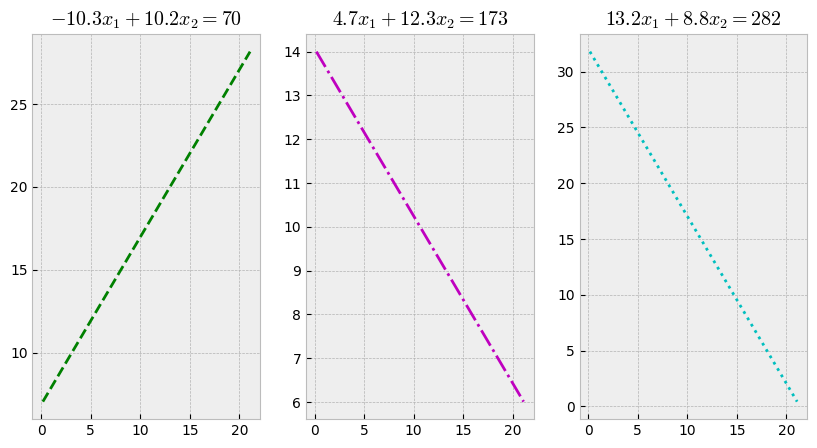

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
styles = ['--g', '-.m', ':c']
for l, a, s, a1a2, b in zip(lines, ax, styles, A, B):
    a.plot(*l, s)
    a.set_title('${} x_1 + {} x_2 = {}$'.format(*a1a2, b))


In [6]:
def generate():
    for i, (l, s, a1a2, b) in enumerate(zip(lines, styles, A, B)):
        plt.plot(*l, s, label=f'f[{i}]')
        plt.annotate('${} x_1 + {} x_2 = {}$'.format(*a1a2, b), (l[0][1], l[1][1]))
    
    plt.plot(intersections[:, 0], intersections[:, 1], '.g')
    X = np.linspace(intersections[:, 0].min(), intersections[:, 0].max())
    plt.fill_between(X, np.min([get_x2(*A[0], B[0], X), get_x2(*A[2], B[2], X)], axis=0),get_x2(*A[1], B[1], X), color='blue')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Intersection of three lines')
    plt.legend()


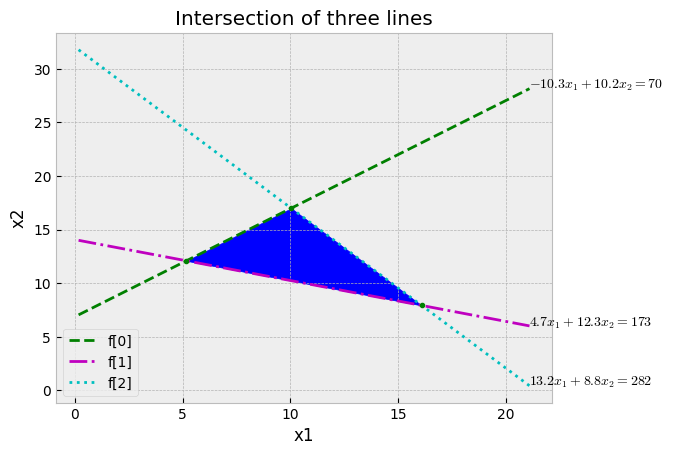

In [7]:
generate()

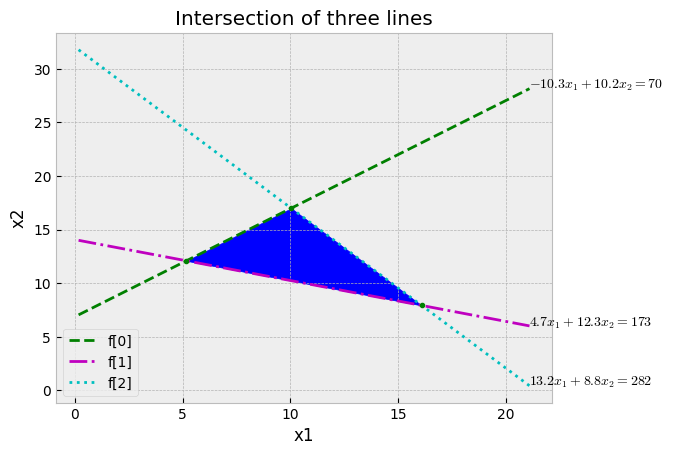

In [8]:
generate()
plt.savefig('result.png')

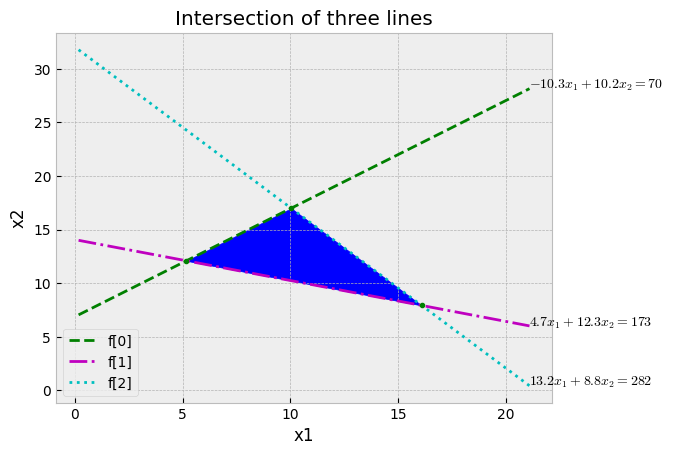

In [9]:
generate()
plt.savefig('result.svg')

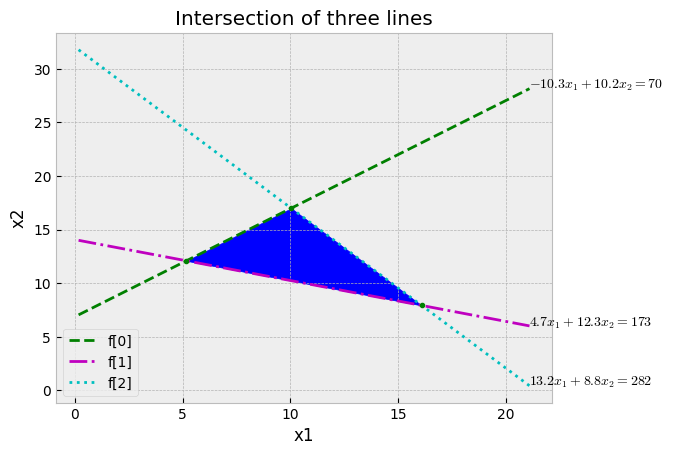

In [10]:
generate()
plt.savefig('result.jpg')